In [2]:
from keras import applications
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


# Construction du réseau

In [3]:
data_dir = "Examples/"
img_width = 200
img_height = 200
nb_classes = 15 #network trained with 15 classes

In [4]:
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(rate=0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(nb_classes, activation="softmax")(x)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# creating the final model 
model_final = Model(input = model.input, output = predictions)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [6]:
model_final.load_weights('model_final_weights.h5', by_name=False)

# Rappel des classes

In [7]:
classes = {'n02085620-Chihuahua': 0,
 'n02085782-Japanese_spaniel': 1,
 'n02085936-Maltese_dog': 2,
 'n02086079-Pekinese': 3,
 'n02086240-Shih-Tzu': 4,
 'n02086646-Blenheim_spaniel': 5,
 'n02088632-bluetick': 6,
 'n02091032-Italian_greyhound': 7,
 'n02099601-golden_retriever': 8,
 'n02102973-Irish_water_spaniel': 9,
 'n02107142-Doberman': 10,
 'n02109961-Eskimo_dog': 11,
 'n02110063-malamute': 12,
 'n02113023-Pembroke': 13,
 'n02113712-miniature_poodle': 14}

# Prédiction - 1

In [8]:
#load image
img_path = 'chihuahua-poilu.jpg'
img = image.load_img(data_dir + img_path, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


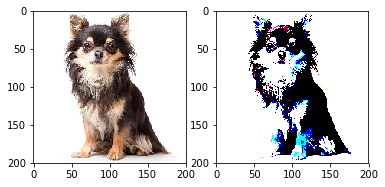

In [9]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(x[0])

In [10]:
y_pred = model_final.predict(x)

In [11]:
for race, value in classes.items():
    if value == y_pred.argmax(axis=-1):
        print(race)

n02086079-Pekinese


# Prédiction - 2

In [12]:
#load image
img_path = 'chihuahua-rasé.jpg'
img = image.load_img(data_dir + img_path, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


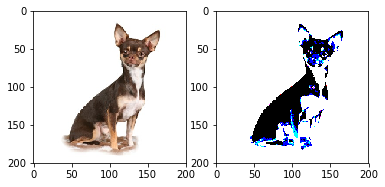

In [13]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(x[0])

In [14]:
y_pred = model_final.predict(x)

In [15]:
for race, value in classes.items():
    if value == y_pred.argmax(axis=-1):
        print(race)

n02085620-Chihuahua


In [20]:
# Prédiction - 3

In [16]:
img_path = 'n02086079_17686.jpg'
img = image.load_img('Images/n02086079-Pekinese/' + img_path, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


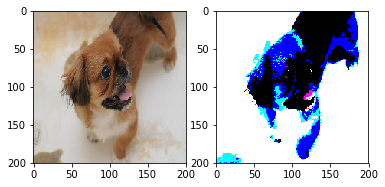

In [17]:
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(x[0])

In [18]:
y_pred = model_final.predict(x)

In [19]:
for race, value in classes.items():
    if value == y_pred.argmax(axis=-1):
        print(race)

n02086079-Pekinese


# Détail pas à pas

In [16]:
from keras import backend as K

In [17]:
def get_layer_output(i, x):
    get_layer = K.function([model_final.layers[0].input], [model_final.layers[i].output])
    return get_layer([x])

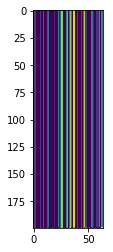

In [110]:
plt.imshow(get_layer_output(1, x)[0][0][0])

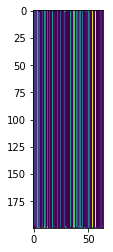

In [111]:
plt.imshow(get_layer_output(2, x)[0][0][0])

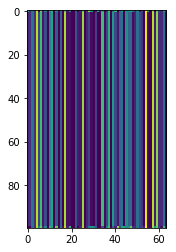

In [112]:
plt.imshow(get_layer_output(3, x)[0][0][0])

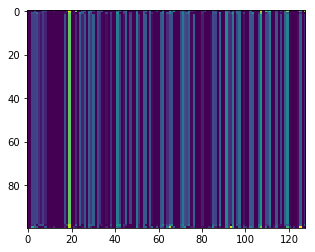

In [113]:
plt.imshow(get_layer_output(4, x)[0][0][0])

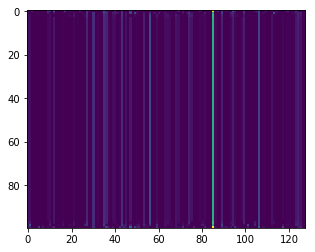

In [114]:
plt.imshow(get_layer_output(5, x)[0][0][0])

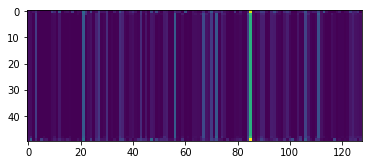

In [115]:
plt.imshow(get_layer_output(6, x)[0][0][0])

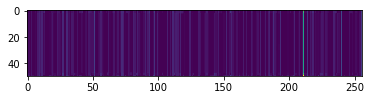

In [116]:
plt.imshow(get_layer_output(7, x)[0][0][0])

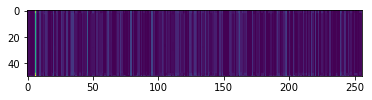

In [117]:
plt.imshow(get_layer_output(8, x)[0][0][0])

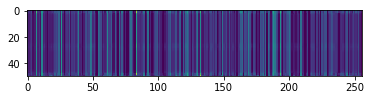

In [118]:
plt.imshow(get_layer_output(9, x)[0][0][0])

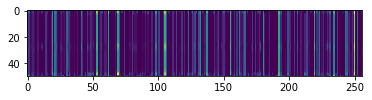

In [119]:
plt.imshow(get_layer_output(10, x)[0][0][0])

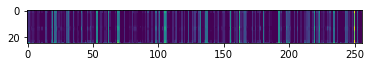

In [120]:
plt.imshow(get_layer_output(11, x)[0][0][0])

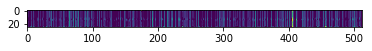

In [121]:
plt.imshow(get_layer_output(12, x)[0][0][0])

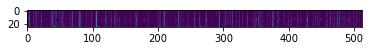

In [122]:
plt.imshow(get_layer_output(13, x)[0][0][0])

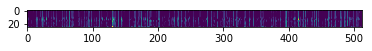

In [123]:
plt.imshow(get_layer_output(14, x)[0][0][0])

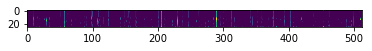

In [124]:
plt.imshow(get_layer_output(15, x)[0][0][0])

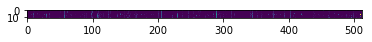

In [125]:
plt.imshow(get_layer_output(16, x)[0][0][0])

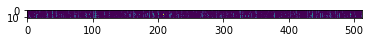

In [126]:
plt.imshow(get_layer_output(17, x)[0][0][0])

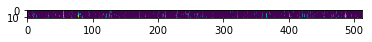

In [127]:
plt.imshow(get_layer_output(18, x)[0][0][0])

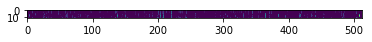

In [128]:
plt.imshow(get_layer_output(19, x)[0][0][0])

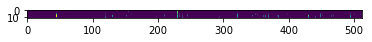

In [129]:
plt.imshow(get_layer_output(20, x)[0][0][0])

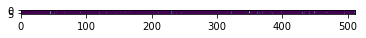

In [130]:
plt.imshow(get_layer_output(21, x)[0][0][0])